In [6]:
#Run1 is considering JW Hamiltonain and 0-to-all connecting ansatz

import numpy as np
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.mappers import JordanWignerMapper

# Create list of terms from your matrix
terms = {}
n_modes = 15

# Your Hamiltonian matrix entries:
data = [
(0, 0, -3.2175),
(0, 1, 0.9461),
(0, 2, -2.6335),
(0, 3, 0.1318),
(0, 4, -0.0761),
(0, 5, -1.4295),
(0, 6, 2.5310),
(0, 8, 1.5117),
(0, 10, -0.1522),
(0, 11, -1.5056),
(0, 12, -0.0761),
(0, 13, 0.9695),
(0, 14, 2.0653),
(1, 0, 0.9461),
(1, 1, -1.6615),
(1, 2, 0.0761),
(1, 3, -1.3268),
(1, 4, 0.1575),
(1, 5, 1.5117),
(1, 7, -2.5310),
(1, 9, 1.5117),
(1, 10, -1.0925),
(1, 11, 0.2174),
(1, 12, 2.5525),
(1, 13, -1.3751),
(1, 14, -0.4243),
(2, 0, -2.6335),
(2, 1, 0.0761),
(2, 2, -4.3665),
(2, 3, 1.5069),
(2, 4, 1.6639),
(2, 5, 0.2805),
(2, 6, -3.6800),
(2, 7, 0.8700),
(2, 10, 0.0761),
(2, 11, 2.0653),
(2, 12, -0.0761),
(2, 14, -1.5056),
(3, 0, 0.1318),
(3, 1, -1.3268),
(3, 2, 1.5069),
(3, 3, -4.4122),
(3, 4, -0.8097),
(3, 6, 1.3751),
(3, 7, -1.3268),
(3, 8, 0.1364),
(3, 9, -1.2432),
(3, 10, 0.9461),
(3, 11, -1.2432),
(3, 13, 0.2935),
(4, 0, -0.0761),
(4, 1, 0.1575),
(4, 2, 1.6639),
(4, 3, -0.8097),
(4, 4, -1.4080),
(4, 5, -0.6417),
(4, 8, -3.6800),
(4, 9, -0.8700),
(4, 10, 2.5525),
(4, 11, 0.4243),
(4, 12, -1.0925),
(4, 14, -0.4457),
(5, 0, -1.4295),
(5, 1, 1.5117),
(5, 2, 0.2805),
(5, 4, -0.6417),
(5, 5, -8.2245),
(5, 6, 1.7100),
(5, 7, 0.8700),
(5, 8, 0.8700),
(5, 9, -3.5709),
(5, 10, 1.5117),
(5, 11, -2.6250),
(5, 12, -0.6417),
(5, 14, 0.9459),
(6, 0, 2.5310),
(6, 2, -3.6800),
(6, 3, 1.3751),
(6, 5, 1.7100),
(6, 6, -4.2640),
(6, 8, 0.2283),
(6, 9, 3.5709),
(6, 10, -1.5117),
(6, 12, 0.8700),
(6, 13, -0.9695),
(7, 1, -2.5310),
(7, 2, 0.8700),
(7, 3, -1.3268),
(7, 5, 0.8700),
(7, 7, -0.5690),
(7, 8, -0.9350),
(7, 9, 0.6417),
(7, 11, 1.5117),
(7, 12, -1.4600),
(7, 13, 0.1318),
(8, 0, 1.5117),
(8, 3, 0.1364),
(8, 4, -3.6800),
(8, 5, 0.8700),
(8, 6, 0.2283),
(8, 7, -0.9350),
(8, 8, -1.9542),
(8, 9, 0.8700),
(8, 10, -3.0987),
(8, 13, 0.7348),
(8, 14, 0.8700),
(9, 1, 1.5117),
(9, 3, -1.2432),
(9, 4, -0.8700),
(9, 5, -3.5709),
(9, 6, 3.5709),
(9, 7, 0.6417),
(9, 8, 0.8700),
(9, 9, 0.7708),
(9, 11, -3.0987),
(9, 13, 0.9461),
(9, 14, 1.4600),
(10, 0, -0.1522),
(10, 1, -1.0925),
(10, 2, 0.0761),
(10, 3, 0.9461),
(10, 4, 2.5525),
(10, 5, 1.5117),
(10, 6, -1.5117),
(10, 8, -3.0987),
(10, 10, -0.8267),
(10, 11, 1.3157),
(10, 12, 0.1575),
(10, 13, 0.7348),
(10, 14, -0.4243),
(11, 0, -1.5056),
(11, 1, 0.2174),
(11, 2, 2.0653),
(11, 3, -1.2432),
(11, 4, 0.4243),
(11, 5, -2.6250),
(11, 7, 1.5117),
(11, 9, -3.0987),
(11, 10, 1.3157),
(11, 11, -0.0342),
(11, 12, 0.4243),
(11, 13, 0.1364),
(11, 14, -2.2650),
(12, 0, -0.0761),
(12, 1, 2.5525),
(12, 2, -0.0761),
(12, 4, -1.0925),
(12, 5, -0.6417),
(12, 6, 0.8700),
(12, 7, -1.4600),
(12, 10, 0.1575),
(12, 11, 0.4243),
(12, 12, -0.5905),
(12, 13, 1.5069),
(12, 14, 1.2943),
(13, 0, 0.9695),
(13, 1, -1.3751),
(13, 3, 0.2935),
(13, 6, -0.9695),
(13, 7, 0.1318),
(13, 8, 0.7348),
(13, 9, 0.9461),
(13, 10, 0.7348),
(13, 11, 0.1364),
(13, 12, 1.5069),
(13, 13, -1.6742),
(13, 14, -0.8097),
(14, 0, 2.0653),
(14, 1, -0.4243),
(14, 2, -1.5056),
(14, 4, -0.4457),
(14, 5, 0.9459),
(14, 8, 0.8700),
(14, 9, 1.4600),
(14, 10, -0.4243),
(14, 11, -2.2650),
(14, 12, 1.2943),
(14, 13, -0.8097),
(14, 14, 1.6045),
]

from qiskit.quantum_info import SparsePauliOp

num_qubits = 15

# Merge symmetric terms
pair_terms = {}
for i, j, x in data:
    key = tuple(sorted((i, j)))
    pair_terms[key] = pair_terms.get(key, 0) + x

paulis = []
coeffs = []

identity_coeff = 0.0  # To collect total weight of I terms

for (i, j), x in pair_terms.items():
    if i == j:
        # On-site term: (x / 2)(I - Z_i)
        identity_coeff += x / 2  # Collect I term

        z_term = ['I'] * num_qubits
        z_term[i] = 'Z'
        paulis.append(''.join(z_term)[::-1])
        coeffs.append(-x / 2)
    else:
        # Ensure i < j for consistency
        if i > j:
            i, j = j, i

        # Off-diagonal term: (x / 2)(X_i Z..Z X_j + Y_i Z..Z Y_j)
        # Each term gets x / 4 due to symmetrization
        z_string = ['I'] * num_qubits
        for k in range(i + 1, j):
            z_string[k] = 'I'

        for op in ['X', 'Y']:
            jw_term = z_string.copy()
            jw_term[i] = op
            jw_term[j] = op
            paulis.append(''.join(jw_term)[::-1])
            coeffs.append(x / 4)

# After the loop, add the combined identity term once (if non-zero)
if abs(identity_coeff) > 1e-12:  # Avoid tiny noise
    paulis.append('I' * num_qubits)
    coeffs.append(identity_coeff)

# Build SparsePauliOp
H_JW = SparsePauliOp.from_list(list(zip(paulis, coeffs)))

# Print Hamiltonian
print(H_JW)
print('')
print('Number of Pauli terms =', len(H_JW))


SparsePauliOp(['IIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIXX', 'IIIIIIIIIIIIIYY', 'IIIIIIIIIIIIXIX', 'IIIIIIIIIIIIYIY', 'IIIIIIIIIIIXIIX', 'IIIIIIIIIIIYIIY', 'IIIIIIIIIIXIIIX', 'IIIIIIIIIIYIIIY', 'IIIIIIIIIXIIIIX', 'IIIIIIIIIYIIIIY', 'IIIIIIIIXIIIIIX', 'IIIIIIIIYIIIIIY', 'IIIIIIXIIIIIIIX', 'IIIIIIYIIIIIIIY', 'IIIIXIIIIIIIIIX', 'IIIIYIIIIIIIIIY', 'IIIXIIIIIIIIIIX', 'IIIYIIIIIIIIIIY', 'IIXIIIIIIIIIIIX', 'IIYIIIIIIIIIIIY', 'IXIIIIIIIIIIIIX', 'IYIIIIIIIIIIIIY', 'XIIIIIIIIIIIIIX', 'YIIIIIIIIIIIIIY', 'IIIIIIIIIIIIIZI', 'IIIIIIIIIIIIXXI', 'IIIIIIIIIIIIYYI', 'IIIIIIIIIIIXIXI', 'IIIIIIIIIIIYIYI', 'IIIIIIIIIIXIIXI', 'IIIIIIIIIIYIIYI', 'IIIIIIIIIXIIIXI', 'IIIIIIIIIYIIIYI', 'IIIIIIIXIIIIIXI', 'IIIIIIIYIIIIIYI', 'IIIIIXIIIIIIIXI', 'IIIIIYIIIIIIIYI', 'IIIIXIIIIIIIIXI', 'IIIIYIIIIIIIIYI', 'IIIXIIIIIIIIIXI', 'IIIYIIIIIIIIIYI', 'IIXIIIIIIIIIIXI', 'IIYIIIIIIIIIIYI', 'IXIIIIIIIIIIIXI', 'IYIIIIIIIIIIIYI', 'XIIIIIIIIIIIIXI', 'YIIIIIIIIIIIIYI', 'IIIIIIIIIIIIZII', 'IIIIIIIIIIIXXII', 'IIIIIIIIIIIYYII', 'IIIIIIIIIIXIXII

Number of qubits: 15

--- Running VQE with COBYLA ---


/tmp/ipykernel_127115/3593244302.py:73: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Minimum Eigenvalue: -14.60679026967584
VQE with COBYLA: -14.60679
Delta from reference: 0.00018

--- Running VQE with SLSQP ---


/tmp/ipykernel_127115/3593244302.py:73: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Minimum Eigenvalue: -14.606970193007946
VQE with SLSQP: -14.60697
Delta from reference: 0.00000

--- Running VQE with SPSA ---


/tmp/ipykernel_127115/3593244302.py:73: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Minimum Eigenvalue: -13.72039724013799
VQE with SPSA: -13.72040
Delta from reference: 0.88657


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


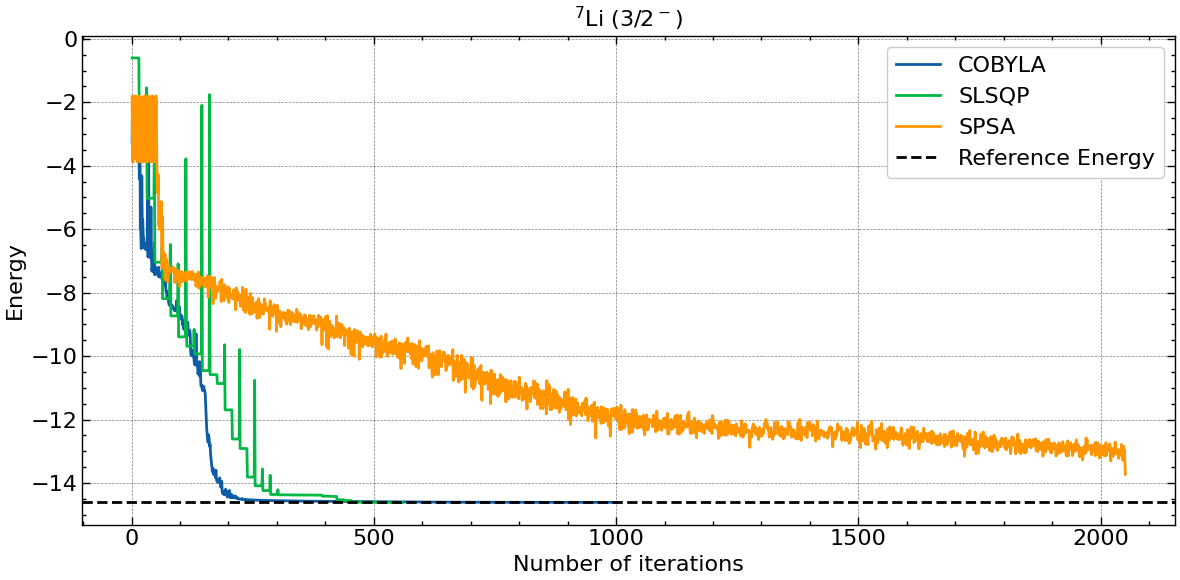

In [7]:
import numpy as np
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import EvolvedOperatorAnsatz
from qiskit.primitives import Estimator
from qiskit_algorithms.minimum_eigensolvers import AdaptVQE, VQE
from qiskit_algorithms.optimizers import SLSQP, COBYLA, SPSA
from qiskit import QuantumCircuit
import matplotlib as plt
import scienceplots
plt.style.use(['science','notebook','grid'])


print(f"Number of qubits: {H_JW.num_qubits}")

from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

# Create parameter vector
params = ParameterVector("theta", 14)

# Create quantum circuit
qc = QuantumCircuit(15)

# Initial gates
qc.x(0)
qc.h(0)
qc.cx(0, 1)
qc.ry(-params[0], 0)
qc.ry(-params[0], 1)
qc.cx(0, 1)
qc.h(0)

# Loop over qubits 2, 8
for i in range(2, 15):
    qc.h(i-1)
    qc.cx(i-1, i)
    qc.ry(-params[i - 1], i-1)
    qc.ry(-params[i - 1], i)
    qc.cx(i-1, i)
    qc.h(i-1)

import pylab

# Shared setup
iterations = 1000
ref_value = -14.60697039
optimizers = {
    "COBYLA": COBYLA(maxiter=iterations),
    "SLSQP": SLSQP(maxiter=iterations),
    # "GradientDescent": GradientDescent(maxiter=iterations),
    "SPSA": SPSA(maxiter=iterations),
}

# Store data for plotting
all_counts = {}
all_values = {}
results = {}

for name, optimizer in optimizers.items():
    counts = []
    values = []

    log_filename = f"Run3_intermediate_{name.lower()}.txt"
    with open(log_filename, "w") as log_file:

        def store_intermediate_result(eval_count, parameters, mean, std):
            counts.append(eval_count)
            values.append(mean)
            # Log the iteration data to a file
            log_file.write(f"Eval count: {eval_count}, Parameters: {parameters}, Energy: {mean}\n")

        print(f"\n--- Running VQE with {name} ---")
        estimator = Estimator()
        vqe = VQE(estimator, qc, optimizer, callback=store_intermediate_result)
        result = vqe.compute_minimum_eigenvalue(H_JW)
        results[name] = result

        # Save values for plotting
        all_counts[name] = counts
        all_values[name] = values

        # Final summary results
        delta = result.eigenvalue.real - ref_value
        print(f"Minimum Eigenvalue: {result.eigenvalue}")
        print(f"VQE with {name}: {result.eigenvalue.real:.5f}")
        print(f"Delta from reference: {delta:.5f}")

        with open(f"result_{name.lower()}.txt", "w") as f:
            f.write(f"VQE Result using {name}\n")
            f.write(f"Minimum Eigenvalue: {result.eigenvalue.real:.10f}\n")
            f.write(f"Delta from reference: {delta:.10f}\n")

# --- Plot all curves ---
pylab.rcParams["figure.figsize"] = (12, 6)
for name in optimizers:
    pylab.plot(all_counts[name], all_values[name], label=name)
pylab.axhline(y=ref_value, color='k', linestyle='--', label='Reference Energy')
pylab.xlabel("Number of iterations")
pylab.ylabel("Energy")
pylab.title(r"$^7$Li (3/2$^-$)")
pylab.legend()
pylab.tight_layout()
pylab.savefig("7Li_vqe_optimizers_run3.eps", format="eps")
pylab.savefig("7Li_vqe_optimizers_run3.png", format="png")
pylab.show()
